<h1>Image Segmentation with KMeans Clustering</h1>

In [1]:
# Uncomment the following line if opencv library is not installed already
# Assuming using python 3.5+ version
#!pip3 install opencv-python

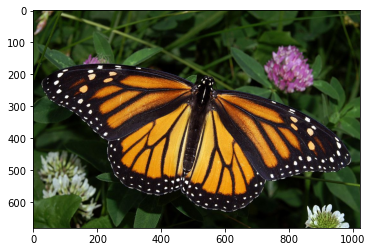

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2 # importing OpenCV library
  
# loading the single image: obtained from Wikipedia
# https://en.wikipedia.org/wiki/File:Monarch_In_May.jpg
image = cv2.imread('data/1024px-Monarch_In_May.jpg') 

# this is one image from the one set of dataset given
#image = cv2.imread('data/emotionet_5_sixth_50000_252586.jpg') 

# this is another image from the one set of dataset given
#image = cv2.imread('data/emotionet_5_sixth_50000_252764.jpg') 

# this is a tiger image in a field
#image = cv2.imread('data/tiger.png') 

# Change color to RGB from OpenCV's BGR format since this library uses BGR format [rather than RGB] for historical purposes
# an interesting perspective on why OpenCV uses BGR : https://learnopencv.com/why-does-opencv-use-bgr-color-format/
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
# showing the image: try comment the above line and run this again (you will see the effect of not converting to RGB format)
plt.imshow(image)

In [3]:
# We will use OpenCV's kmeans implementaiton that takes a 2D array as input
# Documentation here: https://docs.opencv.org/master/d9/d70/tutorial_py_kmeans_index.html

# Reshaping the image into a 2D array of pixels and 3 color values (RGB) 
# Original image: 3D (width, height and depth of 3 RGB values)
# Flattened image: 2D (height and width into a single vector of pixels (3 RGB values) + depth)
flattened_image = image.reshape((-1,3)) 
  
# Convert to float type 
flattened_image = np.float32(flattened_image)

In [4]:
# information about the shape of the Original and Flattened image
print('Original image shape: ',image.shape)
print('Flattened image shape: ',flattened_image.shape)
print('Check: {} = {}'.format(image.shape[0]*image.shape[1], flattened_image.shape[0]))

Original image shape:  (681, 1024, 3)
Flattened image shape:  (697344, 3)
Check: 697344 = 697344


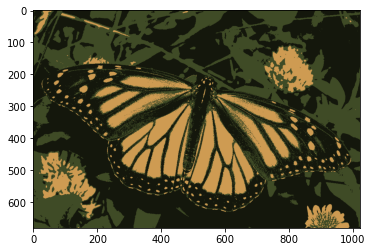

In [5]:
# Now the main part: we are trying to 'cluster' the 'similar' pixels of this image: image is defined by pixel information of RGB
# the below line of code defines the convergence criteria for the KMeans algorithm,  
# either after 100 iterations OR the epsilon (which is the required accuracy)  becomes 80%
# again refer to the documentation: https://docs.opencv.org/master/d1/d5c/tutorial_py_kmeans_opencv.html
# in order to know more about these criteria and more
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.8) 
  
# then perform k-means clustering: number of clusters (k) = 3
# you can change this value to see its impact [number of clusters] later on
# also these three clusters' centres are chosen randomly initially 
k = 3
_, labels, centers = cv2.kmeans(flattened_image, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 
  
# convert data into 8-bit integer values
centers = np.uint8(centers)

# flatten the labels
labels = labels.flatten()

# convert all color pixels of the centroids: cluster is based on the colour intensity/difference
segmented_data = centers[labels] 
 
# reshape data into the Original image dimensions
segmented_image = segmented_data.reshape((image.shape)) 
 
# showing the segmented image
plt.imshow(segmented_image)

In [6]:
# will return the masked image by disabling the cluster {argument}
# e.g., if cluster = 1 is given, that cluser will be suppressed, i.e., in this case, their pixel colour will be masked as 'blue'
# you can change to different colour mask, by changing this line:
# masked_color = [0, 0, 255]
# [0 (R), 0 (G), 255 (B)] is blue....if you want it to be black, change it to 0, 0, 0......
def get_masked_image(image, cluster, clusters):
    # convert to the shape of a vector of pixel values
    masked_color = [0, 0, 255] # current background (mask) color setting is blue
    masked_image = image.reshape((-1, 3))
    for i in range(clusters): 
        if i == cluster: pass # retain this cluster
        # color (i.e cluster) to disable: blue is used because the butterfly image has black as one of the colours
        else: masked_image[labels == i] = masked_color # all disabled clusters will be blue: change this colour combintation for different disabled colour
    # convert back to original shape
    masked_image = masked_image.reshape(image.shape)
    return masked_image

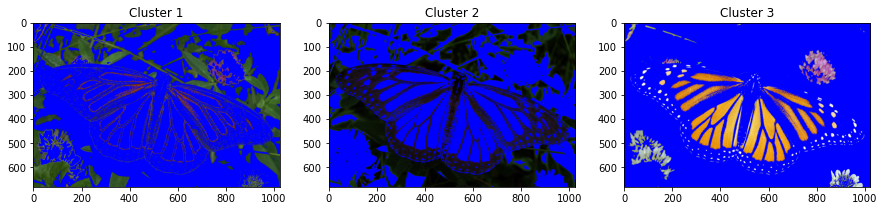

In [7]:
# here, we will view all three different clusters
# showing the different clusters for viewing (turn the pixel into blue of the active cluster)
# remember k = number of clusters (defined in Cell 5)
masked_image1 = get_masked_image(np.copy(image), 0, k) # disable all other clusters except cluster 0
masked_image2 = get_masked_image(np.copy(image), 1, k) # disable all other clusters except cluster 1
masked_image3 = get_masked_image(np.copy(image), 2, k) # disable all other clusters except cluster 2

_ = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(131)
_ = ax1.imshow(masked_image1)
_ = ax1.set_title('Cluster 1')

ax2 = plt.subplot(132)
_ = ax2.imshow(masked_image2)
_ = ax2.set_title('Cluster 2')

ax3 = plt.subplot(133)
_ = ax3.imshow(masked_image3)
_ = ax3.set_title('Cluster 3')

<h2>Conclusion</h2>
Looking at the figures, you can identify the three different clusters that were formed. If the goal was to identify 'butterfly' from images, <strong>Cluster 3</strong> might be useful? Here, you could separate the 'main/target' objects using an unsupervised learning algorithm.
<ul>
    <li>What could be the next steps?</li>
    <li>Any new challenges incorporated by this particular image segmentation if your goal is to just detect 'butterfly' in images - what do you think the shape of the butterfly will be according to this segmentation?</li>
<ul>

In [8]:
# saving the image [in this case for the masked image of cluster 3]
saved_image = cv2.cvtColor(masked_image3, cv2.COLOR_BGR2RGB) # again, the conversion is necessary
cv2.imwrite('data/masked_image.jpg', saved_image)

True